In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
# library to clean data 
import re  
  
# Natural Language Tool Kit 
import nltk  
# enable flag to how all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Overview
Here, our aim is to build a dataset that can be used to create a machine learning model to detect whether a domain is DGA or benign. In this exercise, we will only be focusing on domain( suffix, subdomain and tLDs are not included in final data set). 
This notebook explains process that we have followed to generate DGA dataset and various sources that we used to get Benign dataset.

## Benign Dataset  
Benign data set is downloaded from below sources  

### 7.8mn unique data domain data is build using below data source
* [Alex to 1 million(of 5/10/2020)](http://s3.amazonaws.com/alexa-static/top-1m.csv.zip)
* [Cisco Umbrella Top 1 million](http://s3-us-west-1.amazonaws.com/umbrella-static/top-1m.csv.zip)
* [The Majestic one million](http://downloads.majestic.com/majestic_million.csv)  
* [DomCop Top 10M](https://www.domcop.com/files/top/top10milliondomains.csv.zip)  



While creating dataset, we have using tldextract library to extract domain from URLs or fully qualified names. Since data is collected from many sources, duplicate data is removed.


In [5]:
majestic_data = pd.read_csv("majestic_million.csv.zip")
majestic_data.head()

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,facebook.com,com,479814,2769877,facebook.com,com,1,1,478233,2761833
1,2,2,google.com,com,477558,2577827,google.com,com,2,2,475663,2566207
2,3,3,youtube.com,com,434599,2238686,youtube.com,com,3,3,432976,2230599
3,4,4,twitter.com,com,429238,2248255,twitter.com,com,4,4,427729,2241529
4,5,5,instagram.com,com,331472,1548095,instagram.com,com,5,5,330180,1542691


In [6]:
df_10mn = pd.read_csv("top10milliondomains.csv.zip")
df_10mn.head()                      

,Rank,Domain,Open Page Rank
0,1,fonts.googleapis.com,10.0
1,2,facebook.com,10.0
2,3,twitter.com,10.0
3,4,youtube.com,10.0
4,5,google.com,10.0


In [7]:
df_1mn = pd.read_csv("top-1m.csv.zip",header=None)
df_1mn.head()  

,0,1
0,1,google.com
1,2,youtube.com
2,3,tmall.com
3,4,baidu.com
4,5,qq.com


In [8]:
df_1mn.columns=['x','Domain']

In [9]:
df_1mn1 = pd.read_csv("top-1m1.csv.zip",header=None)
df_1mn1.head() 

,0,1
0,1,netflix.com
1,2,api-global.netflix.com
2,3,google.com
3,4,prod.netflix.com
4,5,push.prod.netflix.com


In [10]:
df_1mn1.columns=['x','Domain']

In [11]:
df_benign = pd.concat([majestic_data[['Domain']],df_1mn1[['Domain']],df_1mn[['Domain']],df_10mn[['Domain']]])

In [12]:
df_benign.drop_duplicates(keep='first',inplace=True)

In [13]:
df_benign.shape

(11584643, 1)

In [14]:
df_benign.to_csv("elevenmn_benign.csv.gz",compression="gzip")

In [29]:
# 7 mn from rapid 7
df_benign = pd.read_csv("elevenmn_benign.csv.gz")

In [21]:

import tldextract

def domain_extract(row):
    ext = tldextract.extract(row.Domain)
    return ext.domain

# df_final.loc[:,'domain'] = df_final.apply(lambda row: domain_extract(row) , axis=1)
# df_final.loc[:,'family'] ='benign'
# df_final.loc[:,'label'] ='good'

In [30]:
%%time
df_benign.loc[:,'domain'] = df_benign.apply(lambda row: domain_extract(row) , axis=1)
df_benign.loc[:,'family'] ='benign'
df_benign.loc[:,'label'] ='good'


Wall time: 6min 39s


In [31]:
df_benign.drop_duplicates(subset='domain',keep='first',inplace=True)
df_benign.shape

(7362481, 5)

In [32]:
df_benign[['domain','family','label']].to_csv("alexa_cisco_onenpage_7mn_begin_dataset.csv.gz",compression='gzip',index=False)

In [17]:
df_final = pd.read_csv("alexa_cisco_onenpage_7mn_begin_dataset.csv.gz")

In [34]:
df_benign.head()
df_benign.shape

,Unnamed: 0,Domain,domain,family,label
0,0,facebook.com,facebook,benign,good
1,1,google.com,google,benign,good
2,2,youtube.com,youtube,benign,good
3,3,twitter.com,twitter,benign,good
4,4,instagram.com,instagram,benign,good


(7362481, 5)

In [12]:
df_r = df.drop_duplicates(keep='first')
df_r.shape

(100139103, 1)

In [97]:
df_r.columns=['domain']

In [98]:
df_all = pd.concat([df_r,df_final[['domain']]])

In [99]:
df_all.to_csv("All_Benign_107mn.csv.gz",compression='gzip',index=False)

In [24]:
df_rapid7 = df.sample(frac=.02,random_state=12313)

In [25]:
df_rapid7.loc[:,'family'] = 'benign'
df_rapid7.loc[:,'label'] = 'good'

In [26]:
df_rapid7.columns = ['domain','family','label']

In [27]:
df_rapid7.reset_index(inplace=True)

In [30]:
df_final.head()
df_rapid7.drop(columns='index',inplace=True)
df_rapid7.head()

,domain,family,label
0,facebook,benign,good
1,google,benign,good
2,youtube,benign,good
3,twitter,benign,good
4,instagram,benign,good


,domain,family,label
0,maramiss,benign,good
1,clydeantronerpottery,benign,good
2,dianabryandesigns,benign,good
3,owtandabout,benign,good
4,snilv,benign,good


In [31]:
df_benign_final = pd.concat([df_final,df_rapid7])
df_benign_final.drop_duplicates(subset='domain',keep='first',inplace=True)
df_benign_final.shape

(9776783, 3)

In [32]:
df_benign_final[['domain','family','label']].to_csv("alexa_cisco_onenpage_webpage_rapid7_9mn_begin_dataset.csv.gz",compression='gzip',index=False)

In [33]:
# number unqiue char and lenght of domain
df_benign_final.head()

,domain,family,label
0,facebook,benign,good
1,google,benign,good
2,youtube,benign,good
3,twitter,benign,good
4,instagram,benign,good


In [34]:
df_benign_final = df_benign_final[~df_benign_final.domain.isna()]

In [35]:
df_benign_final.shape

(9776782, 3)

In [36]:
# Add length and number of unique char
df_benign_final.loc[:,'uniquechar'] = df_benign_final.apply(lambda row: len(set(row.domain)) , axis=1)
df_benign_final.loc[:,'length'] = df_benign_final.apply(lambda row: len(row.domain) , axis=1)

In [39]:
df_benign_final.head()

,domain,family,label,uniquechar,length
0,facebook,benign,good,7,8
1,google,benign,good,4,6
2,youtube,benign,good,6,7
3,twitter,benign,good,5,7
4,instagram,benign,good,8,9


In [40]:
df_benign_final.shape

(9776782, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264E719CE88>,
      dtype=object)

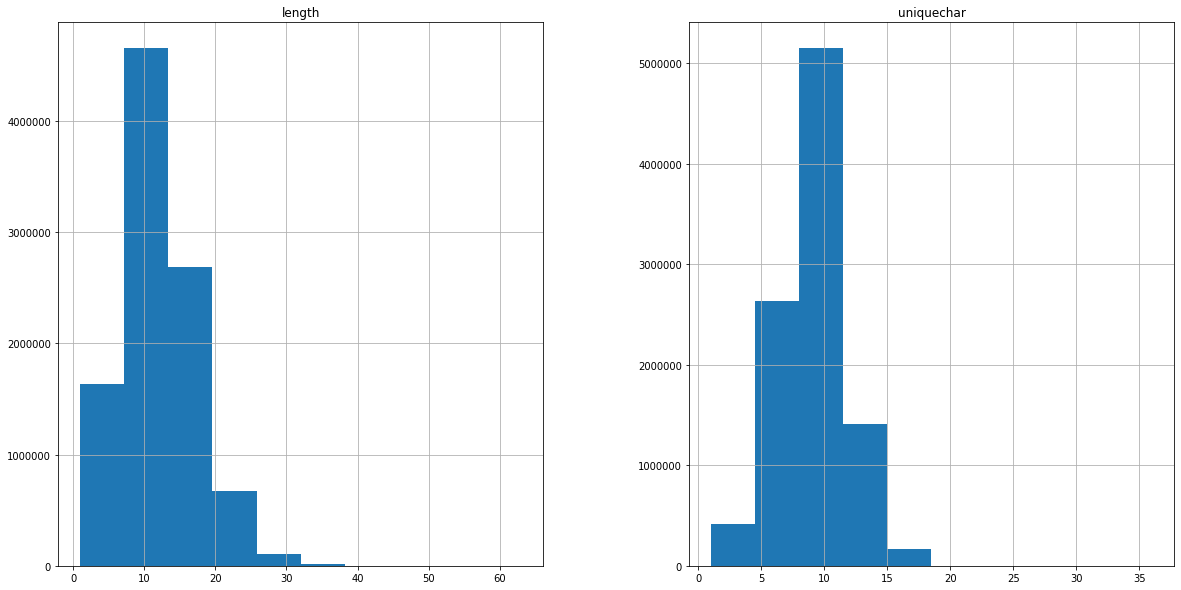

In [45]:
plt.rcParams["figure.figsize"] = (20,10)
df_benign_final[['uniquechar','length']].hist()

In [ ]:
df_all[['uniquechar','length']].hist()

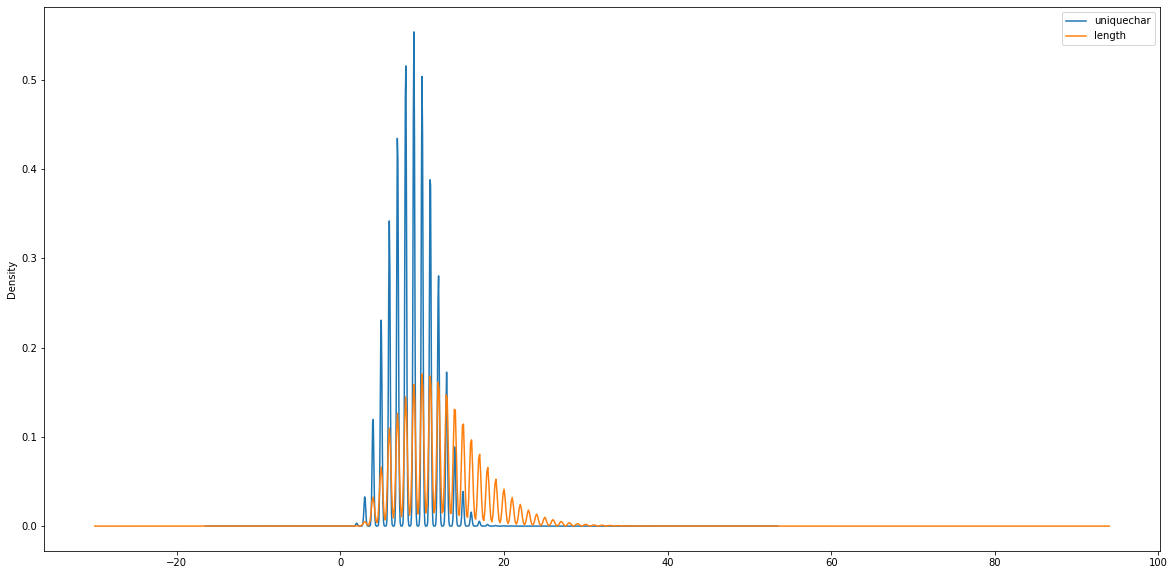

In [46]:
df_benign_final[['uniquechar','length']].plot.kde()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize, ngrams,bigrams
VALID_CHARS = 'abcdefghijklmnopqrstuvwxyz0123456789-_.'
TABLE = None
#benign_bigrams = nltk.bigrams(df_benign_final.domain)
#fdist = nltk.FreqDist(benign_bigrams)


def generate_data_matrix(data):
    x_label = [c for c in VALID_CHARS ]
    y_label = [c for c in VALID_CHARS ]
    x = [VALID_CHARS.index(c) for c in VALID_CHARS ]
    y = [VALID_CHARS.index(c) for c in VALID_CHARS ]
    row = [0 for _ in VALID_CHARS ]
    MATRIX = np.array([row for _ in VALID_CHARS])
    
    # create ngram of var
    for word in data :
        try:
            if word and word is not ' ':
                freqdist = dict(nltk.FreqDist(bigrams(word)))
                for key in freqdist.keys():
                    value = freqdist[key]
                    #print(key)
                    xx = VALID_CHARS.index(key[0])
                    yy = VALID_CHARS.index(key[1])
                    # update matrix value
                    MATRIX[xx,yy] +=value
        except: 
            pass
           
    return MATRIX,x_label,y_label

# generate heatmap
def generate_heatmap(mat,xlabel,ylabel,datatype):
    fig, ax = plt.subplots(figsize=(20,20))
    im = ax.imshow(mat,cmap=plt.get_cmap('summer'))
    ax.set_xticks(np.arange(len(xlabel)))
    ax.set_yticks(np.arange(len(ylabel)))
    ax.set_xticklabels(xlabel)
    ax.set_yticklabels(ylabel)
    ax.set_title(f'{datatype} Heatmap of Bi-Grams')
# create bar
    cbar = fig.colorbar(im,ax=ax)
    plt.show()
    

In [60]:
# create zero matrixs
MAT = generate_heatmap('a','s')

In [74]:
MAT[1,0]
#list(bigrams('faadadacdcrvrvrbasasaaa'))
data = ['faadadacdcrvrvrbasasaaa','facebook','googgle']

0

In [103]:
df_all.head()

,domain
0,marketing-farmaceutico
1,redetzki
2,eleboardsports
3,superecki
4,bustalimeco


In [105]:
df_all[df_all.domain.isna()]

,domain
74530495,NaN
122,NaN
149790,NaN
398286,NaN


In [106]:
df_all.drop(index=74530495,inplace=True)
df_all.drop(index=122,inplace=True)
df_all.drop(index=149790,inplace=True)
df_all.drop(index=398286,inplace=True)

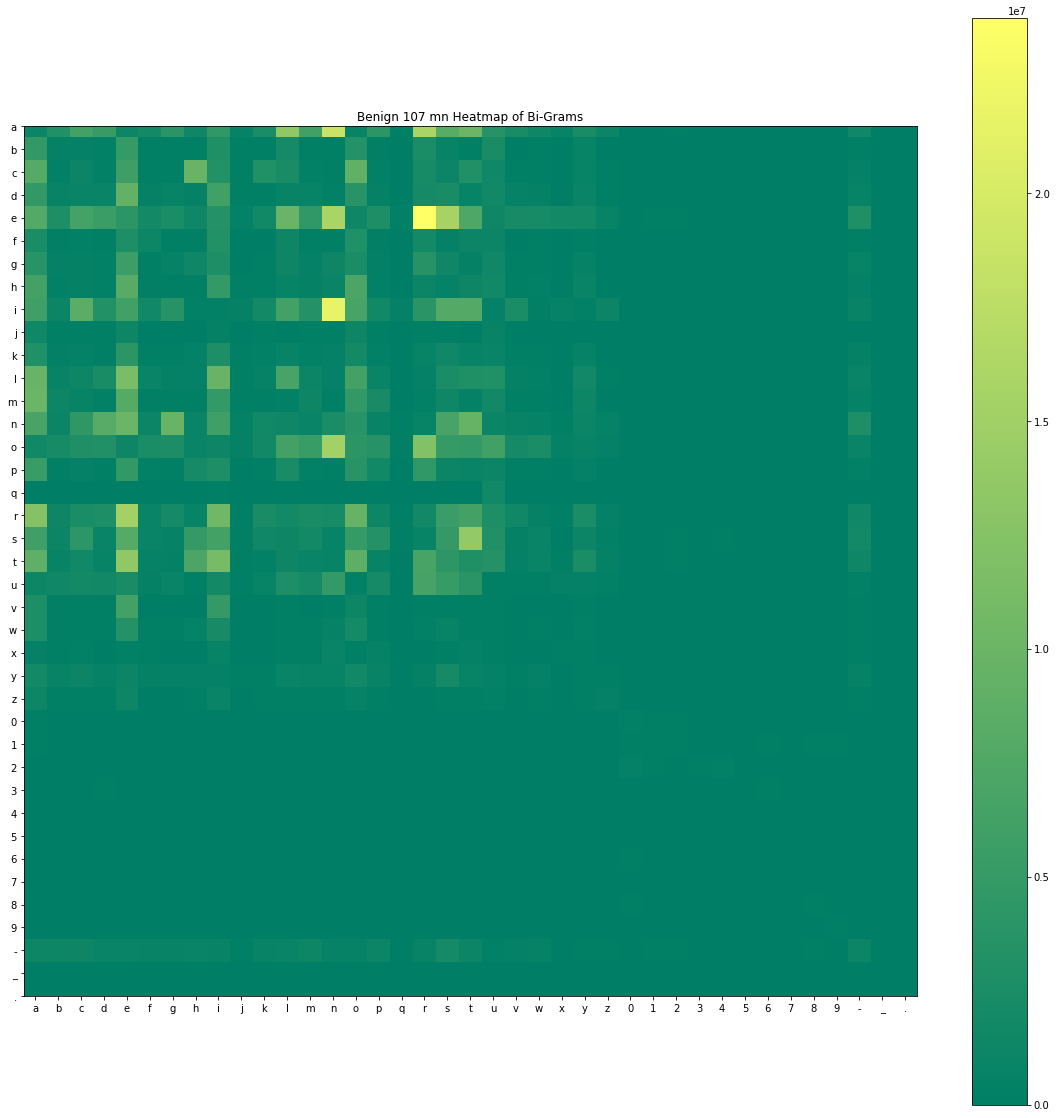

In [107]:
mat,xlabel,ylabel = generate_data_matrix(df_all.domain)
generate_heatmap(mat,xlabel,ylabel,'Benign 107 mn')

In [87]:
mat,xlabel,ylabel = generate_data_matrix(df_benign_final.domain)

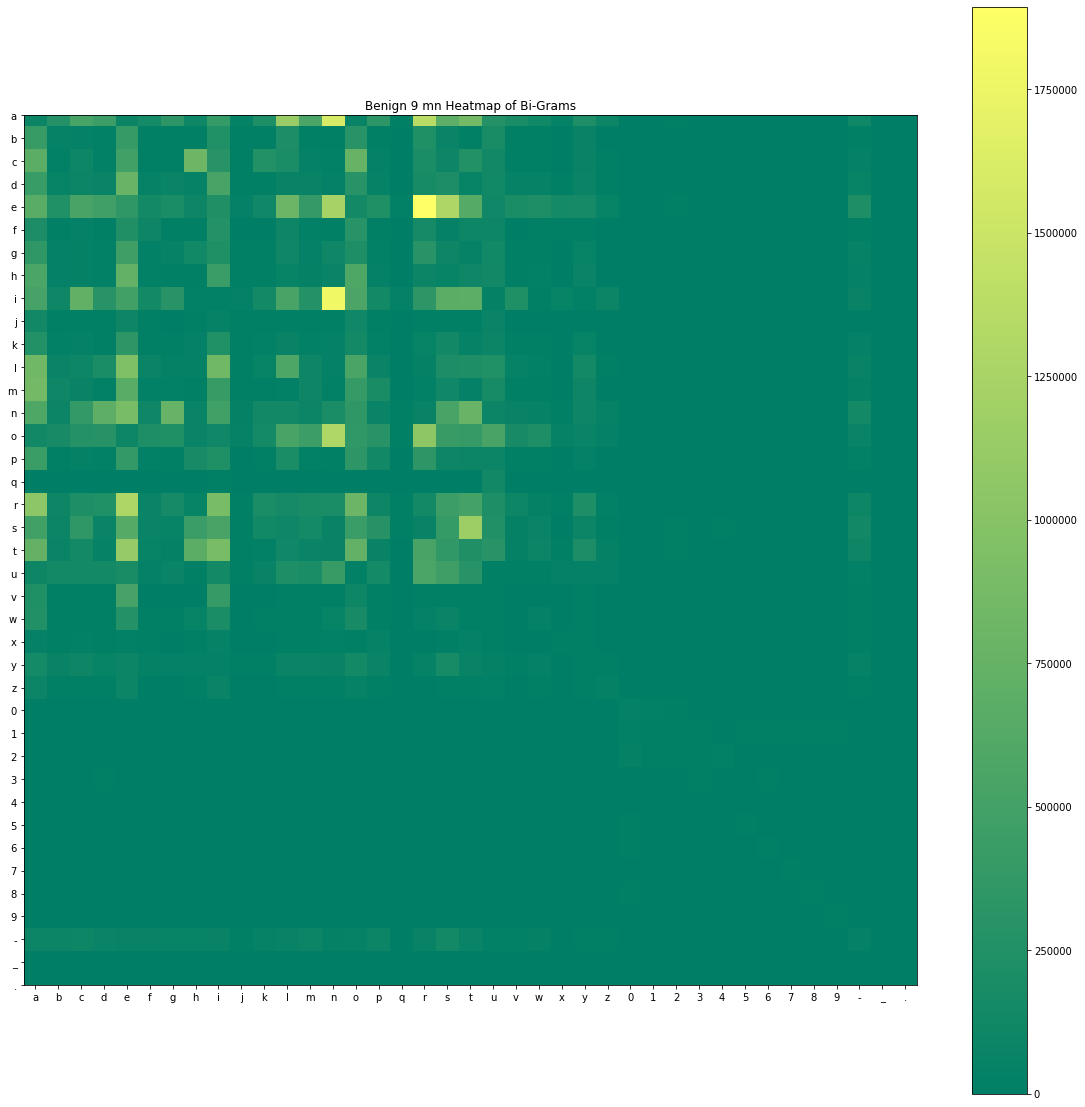

In [88]:
generate_heatmap(mat,xlabel,ylabel,'Benign 9 mn')

## DGA Dataset
9.7 millions DGA data is generate using 45 different algorithms. Please see here for more details on how data in generated. [github](<link to github readme page of dataset).
Docker image of generation program is avaliable at [dockerhub](docker hub link)

several output files are generate using above program. All files are used for creating feature data as below.


In [40]:
df_dga_1 = pd.read_csv("onemillon_dga_1.csv.gz")
df_dga_2 = pd.read_csv("output_dga_2.csv.gz")
df_dga_3 = pd.read_csv("output_dga_3.csv.gz")
df_dga_4 = pd.read_csv("output_dga_4.csv.gz")
df_dga_5 = pd.read_csv("output_dga_5.csv.gz")
df_dga_6 = pd.read_csv("output_dga_6.csv.gz")


In [41]:
df_dga_1.head()
df_dga_1.columns = ['Domain','family','label']
df_dga_2.columns = ['Domain','family','label']
df_dga_3.columns = ['Domain','family','label']
df_dga_4.columns = ['Domain','family','label']
df_dga_5.columns = ['Domain','family','label']
df_dga_6.columns = ['Domain','family','label']
df_dga = pd.concat([df_dga_1[['Domain','family','label']],
                    df_dga_2[['Domain','family','label']],
                    df_dga_3[['Domain','family','label']],
                   df_dga_4[['Domain','family','label']],
                   df_dga_5[['Domain','family','label']],
                   df_dga_6[['Domain','family','label']],])

,domainName,family,label
0,kdeycqkshsoctvg8.net,chinad,bad
1,yt1ud1mdsiaffc8n.cn,chinad,bad
2,2cvy2esvfagmai9l.ru,chinad,bad
3,unobf48gc6sx6476.com,chinad,bad
4,a44z7he1iwnzs7o4.ru,chinad,bad


In [42]:
df_dga.shape

(21350295, 3)

In [43]:
df_dga.drop_duplicates(subset='Domain',keep='first',inplace=True)

In [44]:
df_dga.shape

(12590985, 3)

In [46]:
df_dga.drop(index=816505,inplace=True)

In [47]:
df_dga.loc[:,'domain'] = df_dga.apply(lambda row: domain_extract(row) , axis=1)
df_dga.loc[:,'uniquechar'] = df_dga.apply(lambda row: len(set(row.domain)) , axis=1)
df_dga.loc[:,'length'] = df_dga.apply(lambda row: len(row.domain) , axis=1)

In [48]:
df_dga.drop_duplicates(subset='domain',keep='first',inplace=True)
df_dga.shape

(10644128, 6)

In [49]:
df_dga.groupby(['family']).count()

,Domain,label,domain,uniquechar,length
family,,,,,
bamital,48790,48790,48790,48790,48790
banjori,61488,61488,61488,61488,61488
bobax,207999,207999,207999,207999,207999
chinad,203776,203776,203776,203776,203776
corebot,817754,817754,817754,817754,817754
dircypt,1328,1328,1328,1328,1328
dnscharger,207685,207685,207685,207685,207685
dyre,198413,198413,198413,198413,198413
enviserve,636,636,636,636,636


In [56]:
VALID_CHARS = 'abcdefghijklmnopqrstuvwxyz0123456789-_.'
LOOKUP_TABLE = None
def pad(l, content, width):
        l.extend([content] * (width - len(l)))
        return l
    
def check_validchar(domain):
    for c in domain.lower():
        if c not in VALID_CHARS:
            return False
    return True


In [57]:
df_dga.loc[:,'valid'] = df_dga.apply(lambda row : check_validchar(row.domain), axis=1 )

In [58]:

df_dga.shape
df_dga = df_dga[df_dga.valid]
df_dga.shape


(10644128, 7)

(10461440, 7)

In [59]:
df_dga.sample(frac=.75).to_csv("sevenmillons_dga.csv.gz",compression='gzip',index=False)

### DGA data set analysis

In [3]:
df_dga_final=pd.read_csv("sevenmillons_dga.csv.gz")

In [109]:
df_dga_final.shape
df_dga_final.head()

(9717248, 6)

,Domain,family,label,domain,uniquechar,length
0,1hodsu7i2uou8jef.cn,chinad,bad,1hodsu7i2uou8jef,13,16
1,7gqotxvpzsg0t7r4.info,chinad,bad,7gqotxvpzsg0t7r4,13,16
2,6jcpi4uxktum6nro.info,chinad,bad,6jcpi4uxktum6nro,14,16
3,4k2vlny8rmbbe9u8.info,chinad,bad,4k2vlny8rmbbe9u8,14,16
4,pgvhduc5tyciwh38.ru,chinad,bad,pgvhduc5tyciwh38,14,16


In [12]:
df_dga_final[['family','uniquechar','length']].groupby(['family']).agg(['count','mean'])

uniquechar             length           
                  count       mean   count       mean
family                                               
banjori           61488  13.579479   61488  22.500000
chinad           203776  13.056557  203776  16.000000
corebot          817753  14.779776  817753  18.994673
dircypt            1328  10.935994    1328  13.958584
dnscharger       207685   8.437124  207685  10.000000
fobber           204058   8.434832  204058  10.000000
gameoverzeus       9287  18.154840    9287  25.921072
gozi             408494  11.679351  408494  19.552060
kraken            12166   8.045208   12166   9.508384
locy             428245   9.550640  428245  11.997284
matsnu           199990  13.935722  199990  26.527531
monero            42915   9.077758   42915  13.000000
murofet          429252  13.698072  429252  20.026085
mydoom           201967   6.515545  201967  10.000000
necurs           203635  10.659734  203635  13.992757
newgoz           423988  18.688916  423988  28.000000
nymaim           876880   7.332000  876880   8.506050
others            20611   8.711077   20611  11.753772
padcrypt         670481   8.270267  670481  16.000000
pitou             69263   5.821362   69263   7.999625
pizd              16382   9.289037   16382  12.749786
proslikefan      311850   6.989363  311850   8.022088
pushdo            91849   9.059903   91849  11.836264
pykspa           483213   7.864300  483213   9.635544
qadars            15600  10.187756   15600  12.000000
qakbot           257128  12.103824  257128  16.504694
qsnatch          231090   4.071007  231090   4.282743
ramdo            207272   9.389204  207272  16.000000
ramnit           111445  10.447073  111445  13.499771
ranbyus           51480  12.508761   51480  17.000000
reconyc          857504   9.305446  857504  10.000000
rovnix           411183  12.612192  411183  22.810131
shiotob          208305  10.396131  208305  12.509647
simda             11549   6.179409   11549   7.000000
sisron             5193   8.339303    5193  12.000000
symmi                 1   3.000000       1   4.000000
tempedreve         1841   7.462792    1841   8.487235
tinba             22004   9.160925   22004  12.000318
unjavascript     205733   6.985199  205733   8.015126
unmalware           158   7.436709     158   8.000000
vawtrak          150817   7.643462  150817   9.091840
zloader          572389  13.957808  572389  20.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026481A66BC8>,
      dtype=object)

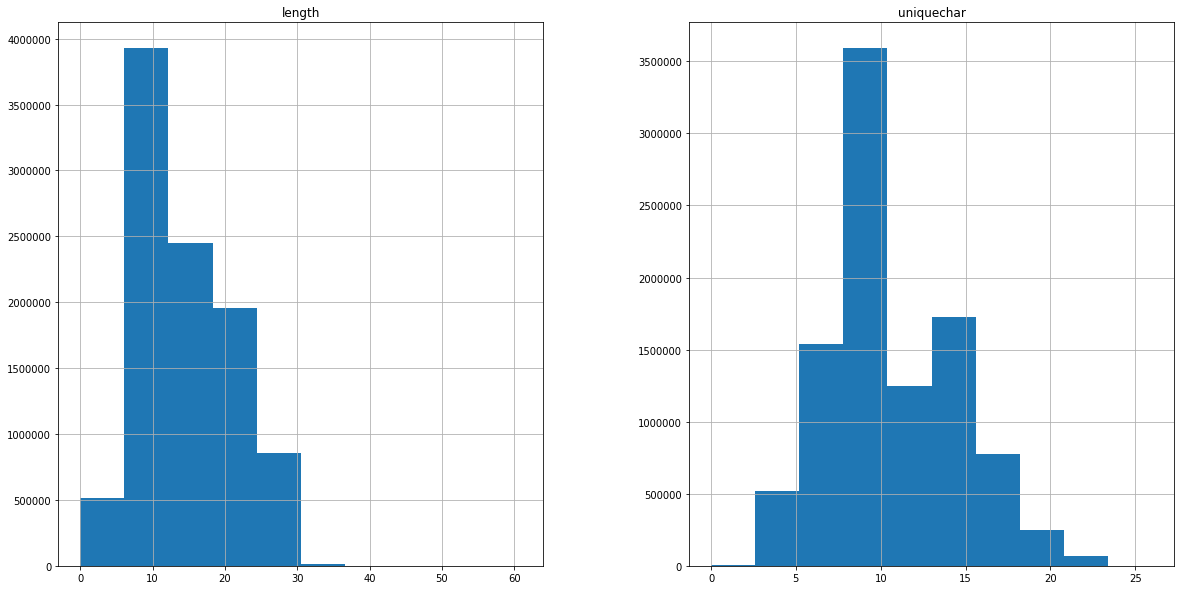

In [110]:
plt.rcParams["figure.figsize"] = (20,10)
df_dga_final[['uniquechar','length']].hist()

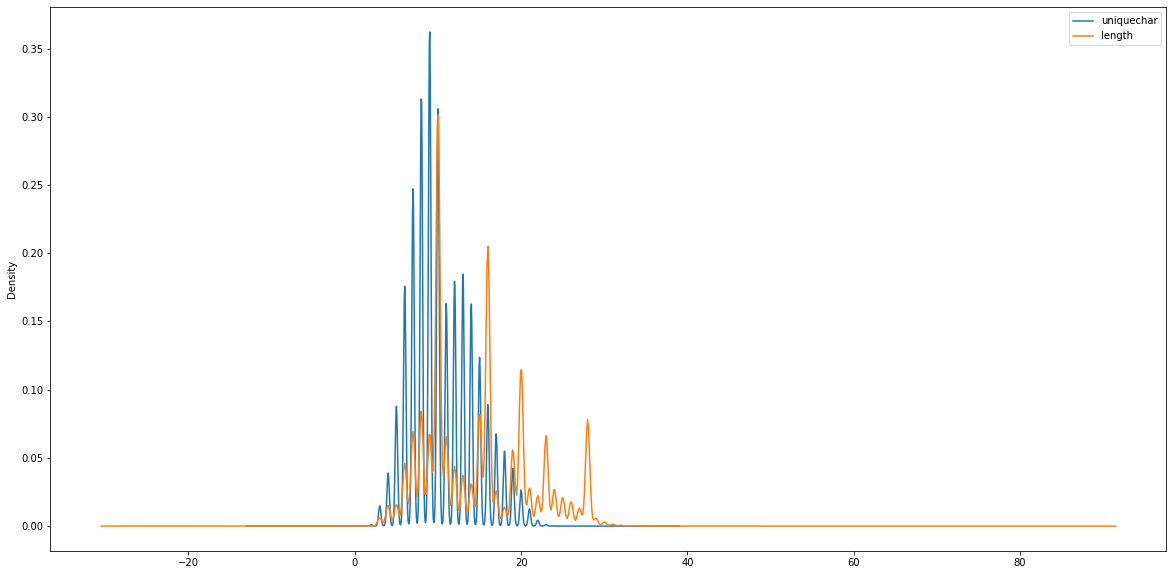

In [111]:
# density graph
df_dga_final[['uniquechar','length']].plot.kde()

In [128]:
df_dga_final.head()

,Domain,family,label,domain,uniquechar,length
0,1hodsu7i2uou8jef.cn,chinad,bad,1hodsu7i2uou8jef,13,16
1,7gqotxvpzsg0t7r4.info,chinad,bad,7gqotxvpzsg0t7r4,13,16
2,6jcpi4uxktum6nro.info,chinad,bad,6jcpi4uxktum6nro,14,16
3,4k2vlny8rmbbe9u8.info,chinad,bad,4k2vlny8rmbbe9u8,14,16
4,pgvhduc5tyciwh38.ru,chinad,bad,pgvhduc5tyciwh38,14,16


In [7]:
def check_validchar(domain):
    try:
        for c in domain.lower():
            if c not in VALID_CHARS:
                return False
    except:
        print(domain)
        return False
    return True

In [8]:
df_dga_final.loc[:,'valid'] = df_dga_final.apply(lambda row: check_validchar(row.domain), axis=1 )

nan
nan
nan


In [9]:
df_dga_final[['valid','label']].groupby(['valid']).count()

,label
valid,
False,182691
True,9534557


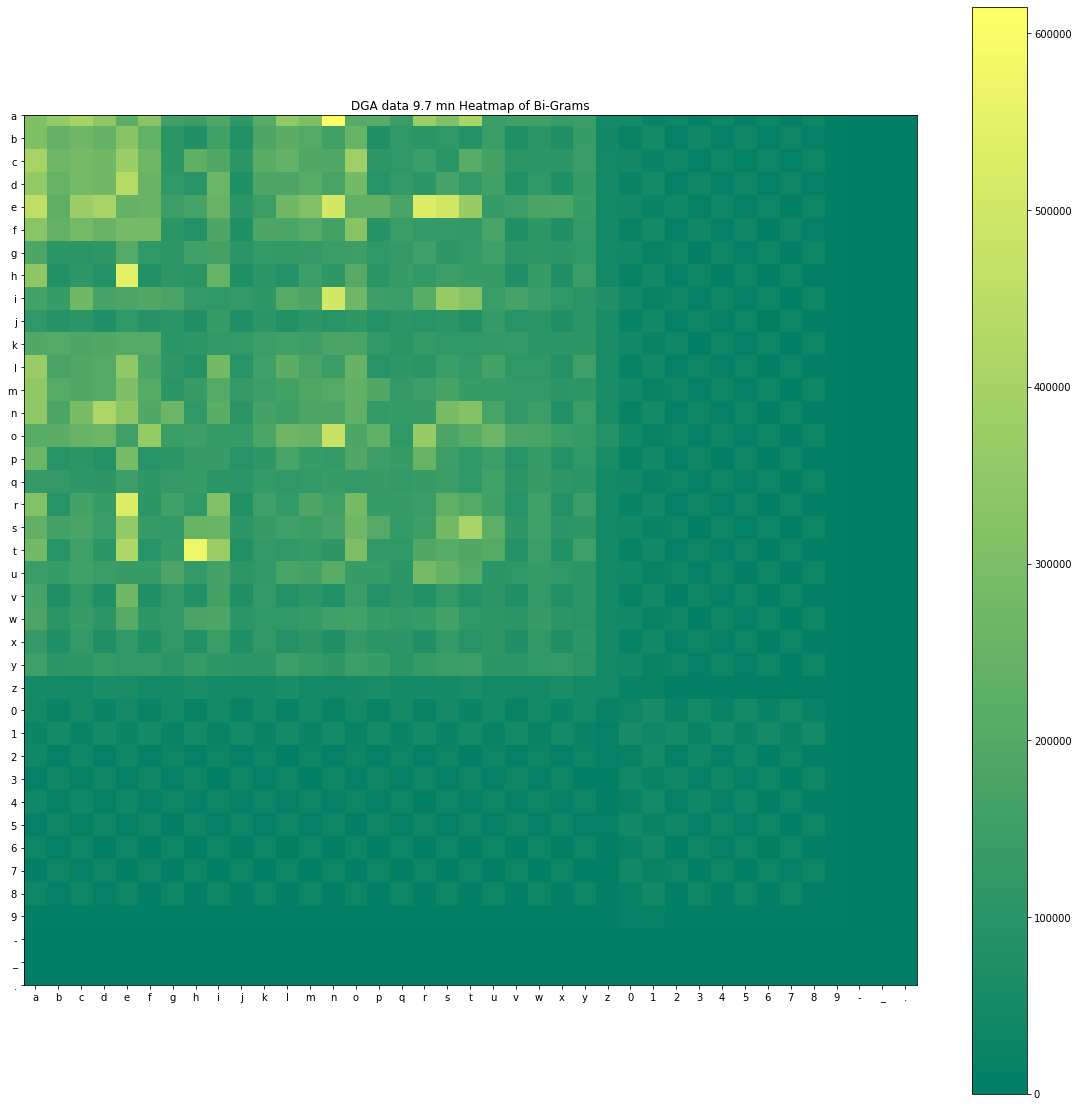

In [10]:
#Heatmap
mat,xlabel,ylabel = generate_data_matrix(df_dga_final[df_dga_final.valid].domain)
generate_heatmap(mat,xlabel,ylabel,'DGA data 9.7 mn')